Answers:
1) engine_hp  
2) 0.979
3) 0.48
4) 0.52   
5) e  
6) f

# Task preparation

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [5]:
cols = ["Make", "Model", "Year", "Engine HP", "Engine Cylinders", "Transmission Type", "Vehicle Style", "highway MPG", "city mpg", "MSRP"]
cols

['Make',
 'Model',
 'Year',
 'Engine HP',
 'Engine Cylinders',
 'Transmission Type',
 'Vehicle Style',
 'highway MPG',
 'city mpg',
 'MSRP']

In [6]:
new_df = df[cols]

In [7]:
new_df.columns = new_df.columns.str.replace(" ", "_").str.lower()

In [8]:
new_df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [9]:
new_df.isna().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [10]:
new_df = new_df.fillna(0)

In [11]:
new_df.isna().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [12]:
avg_price = new_df.msrp.mean()
above_average = (new_df.msrp > avg_price).astype(int)

In [13]:
X_full_train, X_test, y_full_train, y_test = train_test_split(new_df, above_average, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25, random_state=1)

X_full_train.drop("msrp", axis=1, inplace=True)
X_train.drop("msrp", axis=1, inplace=True)
X_val.drop("msrp", axis=1, inplace=True)
X_test.drop("msrp", axis=1, inplace=True)

X_full_train.shape, y_full_train.shape, X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((9531, 9),
 (9531,),
 (7148, 9),
 (7148,),
 (2383, 9),
 (2383,),
 (2383, 9),
 (2383,))

# ROC AUC feature importance

In [14]:
numeric_cols = list(X_train.select_dtypes(include=["int", "float"]).columns)
numeric_cols

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [15]:
X_train.year

5727    2016
5814    2014
8450    2016
2396    2015
5494    2016
        ... 
5864    2015
7924    2016
4719    2017
63      1991
7918    2003
Name: year, Length: 7148, dtype: int64

In [16]:
roc_auc_score(y_train, X_train.year)

0.687551492804683

In [17]:
for col in numeric_cols:
    roc_auc_col = roc_auc_score(y_train, X_train[col])
    print(f"{col}: %.2f" % (roc_auc_col if roc_auc_col >= 0.5 else roc_auc_score(y_train, -X_train[col])))

year: 0.69
engine_hp: 0.92
engine_cylinders: 0.77
highway_mpg: 0.63
city_mpg: 0.67


The highest auc: engine_hp.

In [18]:
dv = DictVectorizer(sparse=False)

train_dict = X_train.to_dict(orient="records")
X_train_ = dv.fit_transform(train_dict)

val_dict = X_val.to_dict(orient="records")
X_val_ = dv.transform(val_dict)

In [19]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

model.fit(X_train_, y_train)
None

In [20]:
y_pred = model.predict_proba(X_val_)[:, 1]
roc_auc_score(y_val, y_pred).round(3)

0.979

In [21]:
X_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
5727,Toyota,Highlander Hybrid,2016,280.0,6.0,AUTOMATIC,4dr SUV,28,27
5814,Chevrolet,Impala Limited,2014,300.0,6.0,AUTOMATIC,Sedan,30,18
8450,Buick,Regal,2016,259.0,4.0,AUTOMATIC,Sedan,27,19
2396,Volkswagen,CC,2015,280.0,6.0,AUTOMATED_MANUAL,Sedan,25,17
5494,Dodge,Grand Caravan,2016,283.0,6.0,AUTOMATIC,Passenger Minivan,25,17
...,...,...,...,...,...,...,...,...,...
5864,Subaru,Impreza,2015,148.0,4.0,MANUAL,4dr Hatchback,33,24
7924,Infiniti,QX50,2016,325.0,6.0,AUTOMATIC,4dr SUV,24,17
4719,Honda,Fit,2017,130.0,4.0,AUTOMATIC,4dr Hatchback,37,32
63,Audi,200,1991,162.0,5.0,AUTOMATIC,Sedan,20,16


In [22]:
thresholds = np.arange(0.0, 1.01, 0.01)

In [31]:
results = []

actual_positive = y_val == 1
actual_negative = y_val == 0

for t in thresholds:
    predict_positive = y_pred >= t
    predict_negative = y_pred < t

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    
    results.append([t, precision, recall])

C:\Users\grigo\AppData\Local\Temp\ipykernel_2748\3735739730.py:15: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp / (tp + fp)


In [32]:
columns = ["threshold", "precision", "recall"]
df_results = pd.DataFrame(results, columns=columns)

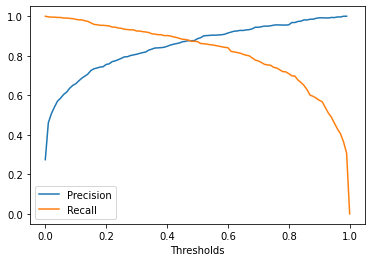

In [33]:
plt.plot(df_results.threshold, df_results.precision, label="Precision")
plt.plot(df_results.threshold, df_results.recall, label="Recall")

plt.legend()
plt.xlabel("Thresholds")
None

Precision and recall curves intersect approximately at threshold 0.48.

In [46]:
results = []

actual_positive = y_val == 1
actual_negative = y_val == 0

for t in thresholds:
    predict_positive = y_pred >= t
    predict_negative = y_pred < t

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    f1 = 2 * ((precision * recall) / (precision + recall))
    
    results.append([t.round(2), f1.round(3)])

C:\Users\grigo\AppData\Local\Temp\ipykernel_2748\3332160572.py:15: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp / (tp + fp)


In [47]:
results.sort(key=lambda x: x[1], reverse=True)

In [48]:
results

[[0.52, 0.88],
 [0.53, 0.88],
 [0.5, 0.879],
 [0.54, 0.879],
 [0.55, 0.879],
 [0.46, 0.878],
 [0.47, 0.878],
 [0.42, 0.877],
 [0.43, 0.877],
 [0.45, 0.877],
 [0.56, 0.877],
 [0.41, 0.876],
 [0.44, 0.876],
 [0.51, 0.876],
 [0.57, 0.876],
 [0.6, 0.876],
 [0.49, 0.875],
 [0.58, 0.875],
 [0.59, 0.875],
 [0.4, 0.874],
 [0.48, 0.874],
 [0.36, 0.873],
 [0.38, 0.873],
 [0.37, 0.872],
 [0.34, 0.871],
 [0.35, 0.871],
 [0.39, 0.871],
 [0.62, 0.869],
 [0.61, 0.868],
 [0.63, 0.868],
 [0.33, 0.867],
 [0.64, 0.867],
 [0.32, 0.866],
 [0.31, 0.865],
 [0.29, 0.863],
 [0.65, 0.863],
 [0.3, 0.862],
 [0.66, 0.862],
 [0.28, 0.861],
 [0.67, 0.861],
 [0.26, 0.859],
 [0.27, 0.859],
 [0.25, 0.856],
 [0.68, 0.856],
 [0.24, 0.853],
 [0.69, 0.853],
 [0.23, 0.851],
 [0.7, 0.85],
 [0.22, 0.849],
 [0.71, 0.847],
 [0.21, 0.845],
 [0.2, 0.843],
 [0.72, 0.843],
 [0.73, 0.841],
 [0.74, 0.84],
 [0.19, 0.836],
 [0.18, 0.835],
 [0.75, 0.835],
 [0.17, 0.834],
 [0.76, 0.833],
 [0.16, 0.832],
 [0.15, 0.829],
 [0.77, 0.827],
 [

F1 is maximal at threshold 0.52.